In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("tennis.csv")

In [3]:
df.sample(5)

,Outlook,Temperature,Humidity,Windy,Play
3,Rainy,Mild,High,No,Yes
7,Sunny,Mild,High,No,No
10,Sunny,Mild,Normal,Yes,Yes
0,Sunny,Hot,High,No,No
9,Rainy,Mild,Normal,No,Yes


### 2b

In [4]:
def entropy(y):
    unique, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))
H_Y = entropy(df['Play'])

# Calculate Information Gain for each attribute
attributes = ['Outlook', 'Temperature', 'Humidity', 'Windy']
for attr in attributes:
    H_Y_given_X = 0
    unique_values = df[attr].unique()
    for val in unique_values:
        subset_Y = df['Play'][df[attr] == val].tolist()
        weight = len(subset_Y) / len(df['Play'])
        H_Y_given_X += weight * entropy(subset_Y)

    IG = H_Y - H_Y_given_X
    print(f'Information Gain for {attr}: {IG}')

Information Gain for Outlook: 0.24674981977443933
Information Gain for Temperature: 0.02922256565895487
Information Gain for Humidity: 0.15183550136234159
Information Gain for Windy: 0.04812703040826949


In [5]:
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temperature', 'Humidity', 'Windy'])

# Split the data into features (X) and the target variable (Y)
X = df_encoded.drop(columns=['Play'])
Y = df_encoded['Play']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [6]:
# Make predictions on the testing data
Y_pred = clf.predict(X_test)

# Calculate accuracy on the testing data
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


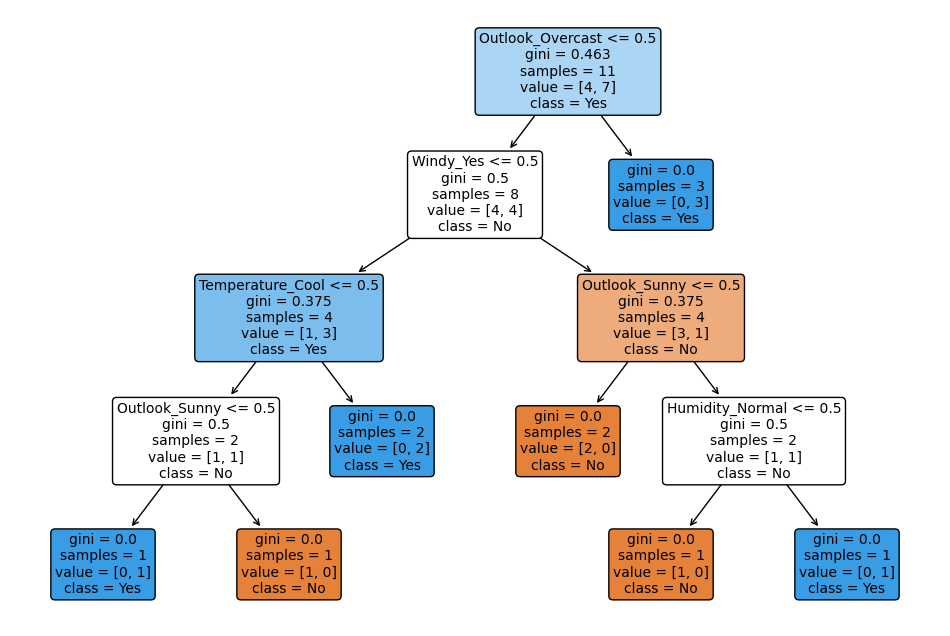

In [7]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=['No', 'Yes'], rounded=True, fontsize=10)
plt.show()

### 3b (1)

enter true labels seperated by space:1 0 1 0 1 1 0 0 1 0
enter 10 predicted labels seperated by space:1 1 1 0 1 0 0 1 1 0


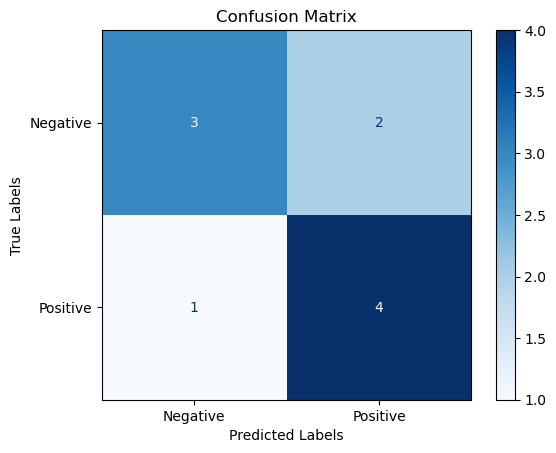

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay,f1_score
import matplotlib.pyplot as plt

# True labels and predicted labels
# true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
# predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
true_labels=[int(x) for x in input("enter true labels seperated by space:").split()]
predicted_labels=[int(x) for x in input(f"enter {len(true_labels)} predicted labels seperated by space:").split()]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_names = ['Negative', 'Positive']

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)

# Add labels to the plot
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

In [13]:
# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

#f1 score
f1 = f1_score(true_labels, predicted_labels)

# Calculate specificity
specificity = TN / (TN + FP)

# Calculate negative predictive value (NPV)
npv = TN / (TN + FN)

# Calculate true positive rate (TPR) or recall
tpr = TP / (TP + FN)

# Calculate false positive rate (FPR)
fpr = FP / (FP + TN)

print("True Positives (TP):",TP)
print("True Negatives (TN):",TN)
print("False Postives (FP):",FP)
print("False Negatives (FN): ",FN)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (True Positive Rate):", recall)
print("F1-Score:",f1)
print("Specificity:", specificity)
print("Negative Predictive Value (NPV):", npv)
print("True Positive Rate (TPR or Recall):", tpr)
print("False Positive Rate (FPR):", fpr)


True Positives (TP): 4
True Negatives (TN): 3
False Postives (FP): 2
False Negatives (FN):  1
Accuracy: 0.7
Precision: 0.6666666666666666
Recall (True Positive Rate): 0.8
F1-Score: 0.7272727272727272
Specificity: 0.6
Negative Predictive Value (NPV): 0.75
True Positive Rate (TPR or Recall): 0.8
False Positive Rate (FPR): 0.4
